In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/heart_disease_dataset.csv')

# Display the first few rows of the dataset
df.head()




,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [ ]:
# b. Dataset shape
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1000, 16)


In [ ]:
#c. Data Cleaning
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64


In [ ]:
# d. Data types of columns
print("Data types of columns:\n", df.dtypes)

Data types of columns:
 Age                         int64
Gender                     object
Cholesterol                 int64
Blood Pressure              int64
Heart Rate                  int64
Smoking                    object
Alcohol Intake             object
Exercise Hours              int64
Family History             object
Diabetes                   object
Obesity                    object
Stress Level                int64
Blood Sugar                 int64
Exercise Induced Angina    object
Chest Pain Type            object
Heart Disease               int64
dtype: object


In [ ]:
# e. Statistical summary
print("Statistical summary:")
df.describe()

Statistical summary:


,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [ ]:
# f. Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [ ]:
# Convert categorical variables to category type if needed
categorical_cols = ['Gender', 'Smoking', 'Alcohol Intake', 'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease']
for col in categorical_cols:
    df[col] = df[col].astype('category')

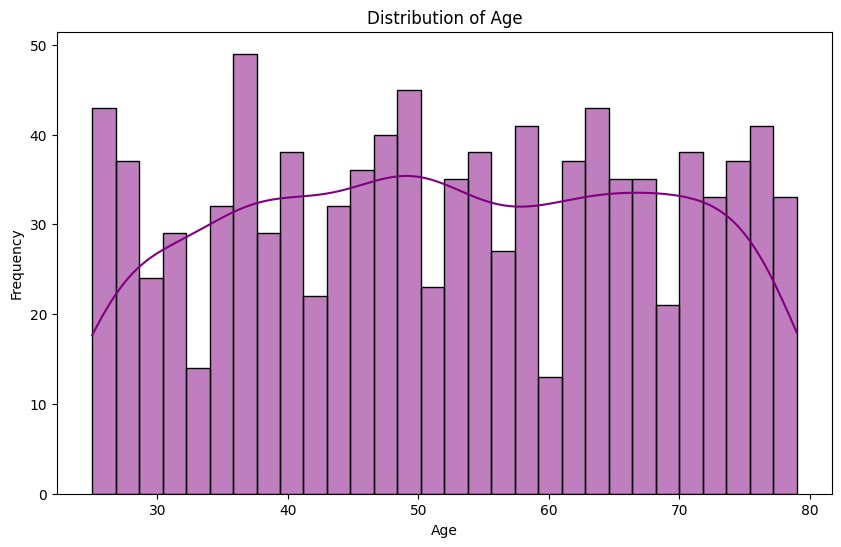

In [ ]:
# Exploratory Data Analysis
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True,color='purple')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

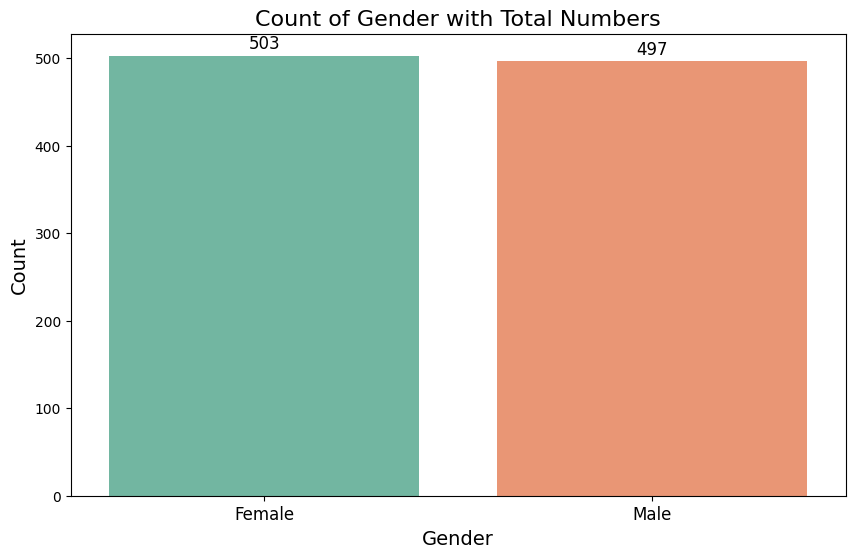

In [ ]:
# Count plot for Gender with annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', data=df, hue='Gender', palette='Set2')

plt.title('Count of Gender with Total Numbers', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set custom labels for the gender categories
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=12)

# Annotate the bars with the total number of each category
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


<ipython-input-29-7324e10207fb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='YlOrBr')
<ipython-input-29-7324e10207fb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='YlOrBr')
<ipython-input-29-7324e10207fb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='YlOrBr')
<ipython-input-29-7324e10207fb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

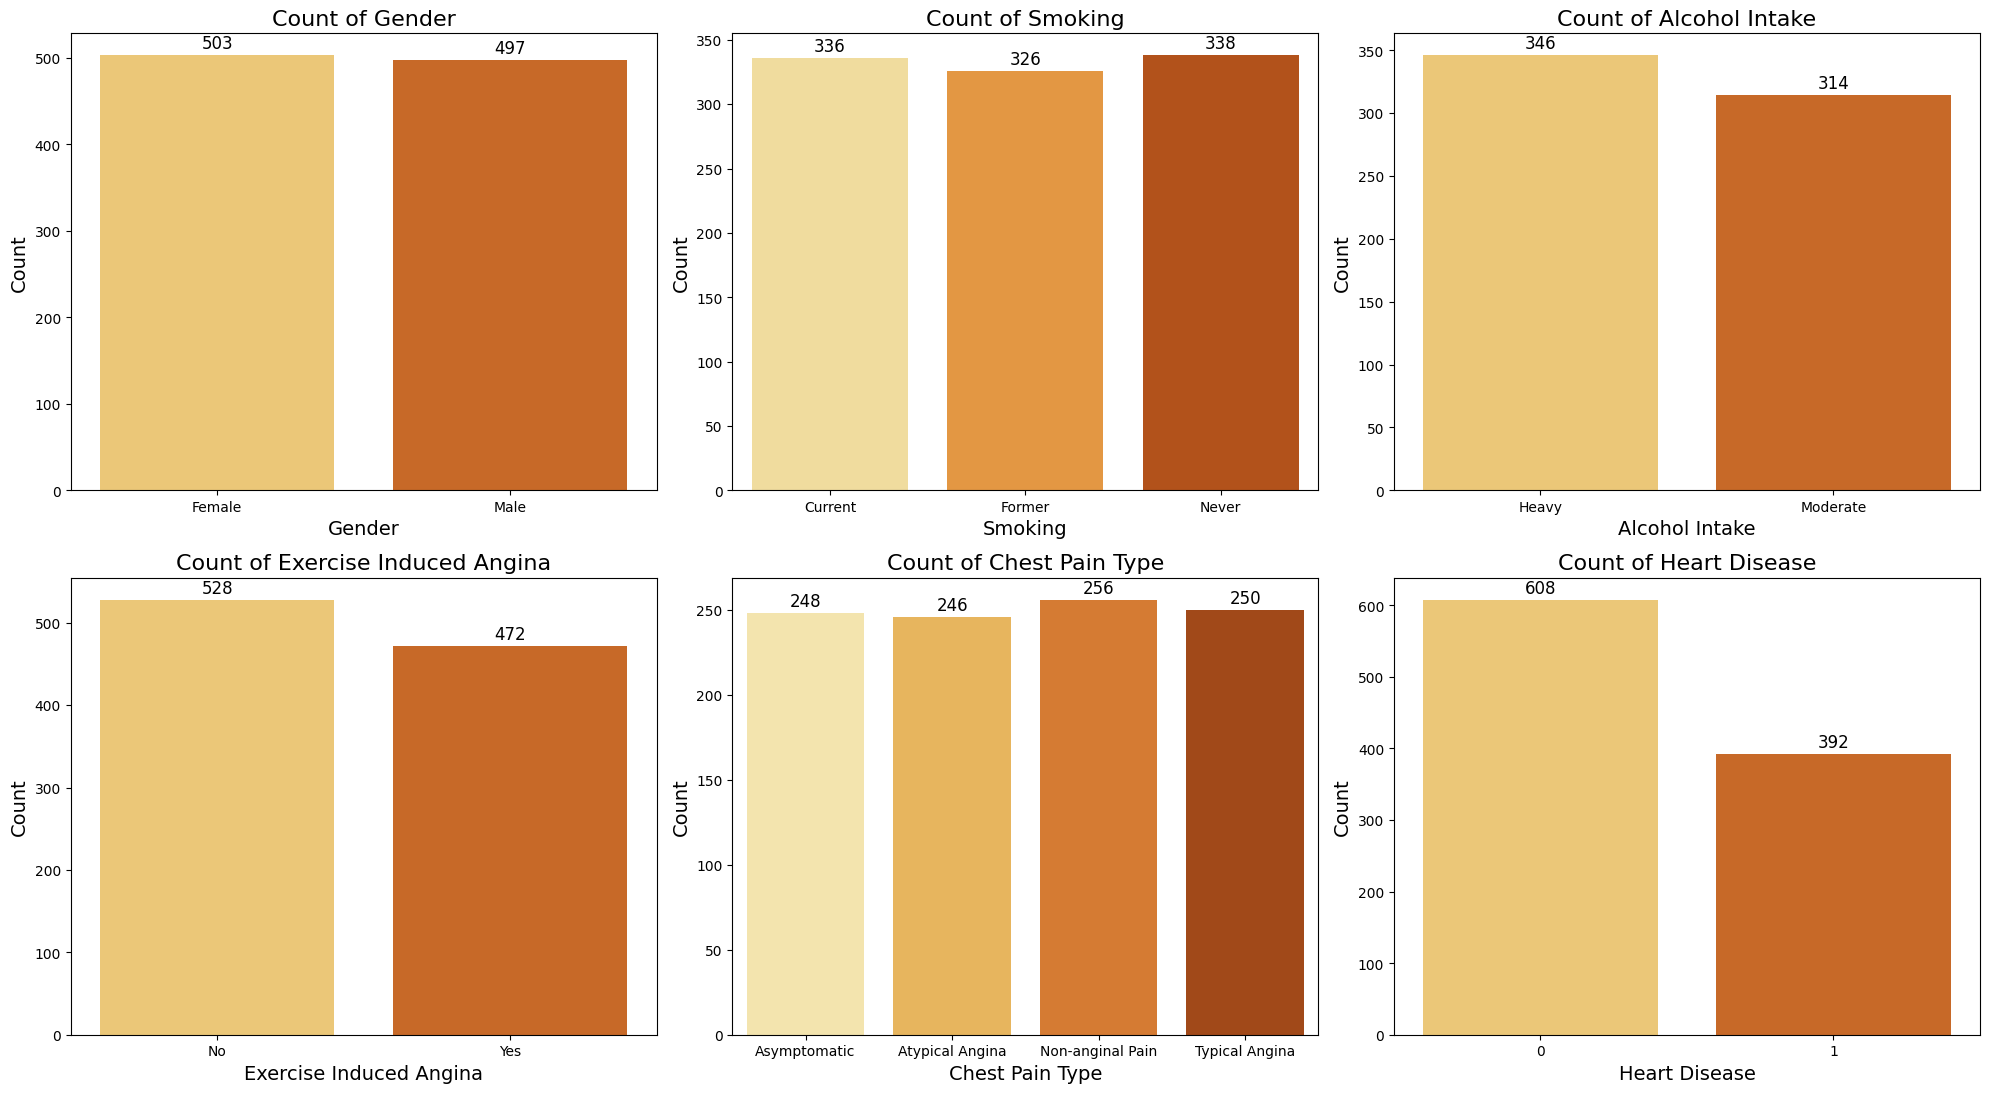

In [ ]:
# Count plots of categorical columns with annotations
categorical_cols = df.select_dtypes(include='category').columns
plt.figure(figsize=(20,16))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(x=col, data=df, palette='YlOrBr')
    plt.title(f'Count of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Annotate the bars with the total number of each category
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


<ipython-input-23-cd0ae9d16aac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Heart Disease', data=df, palette='viridis')


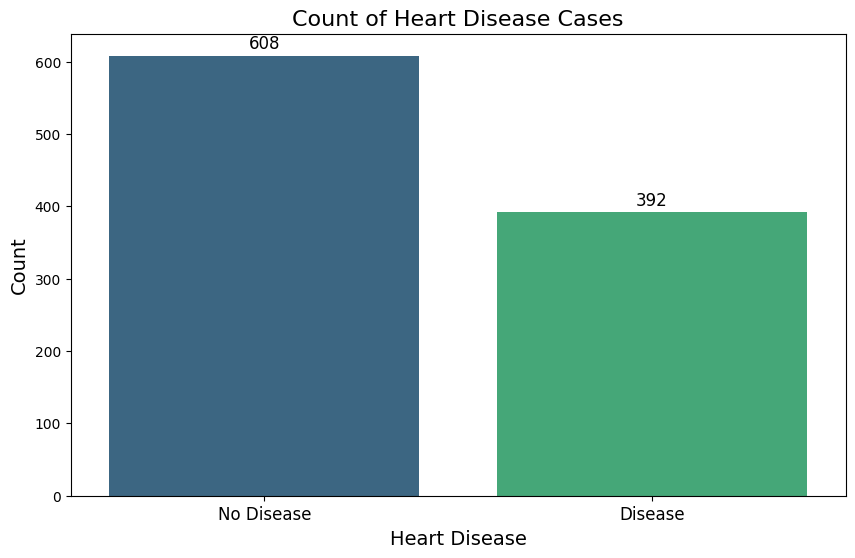

In [ ]:
# Count plot for Heart Disease with annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Heart Disease', data=df, palette='viridis')

plt.title('Count of Heart Disease Cases', fontsize=16)
plt.xlabel('Heart Disease', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set custom labels for Heart Disease categories (if applicable)
# Assuming 0 = No Disease, 1 = Disease. Adjust labels as per your data.
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'], fontsize=12)

# Annotate the bars with the total number of each category
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


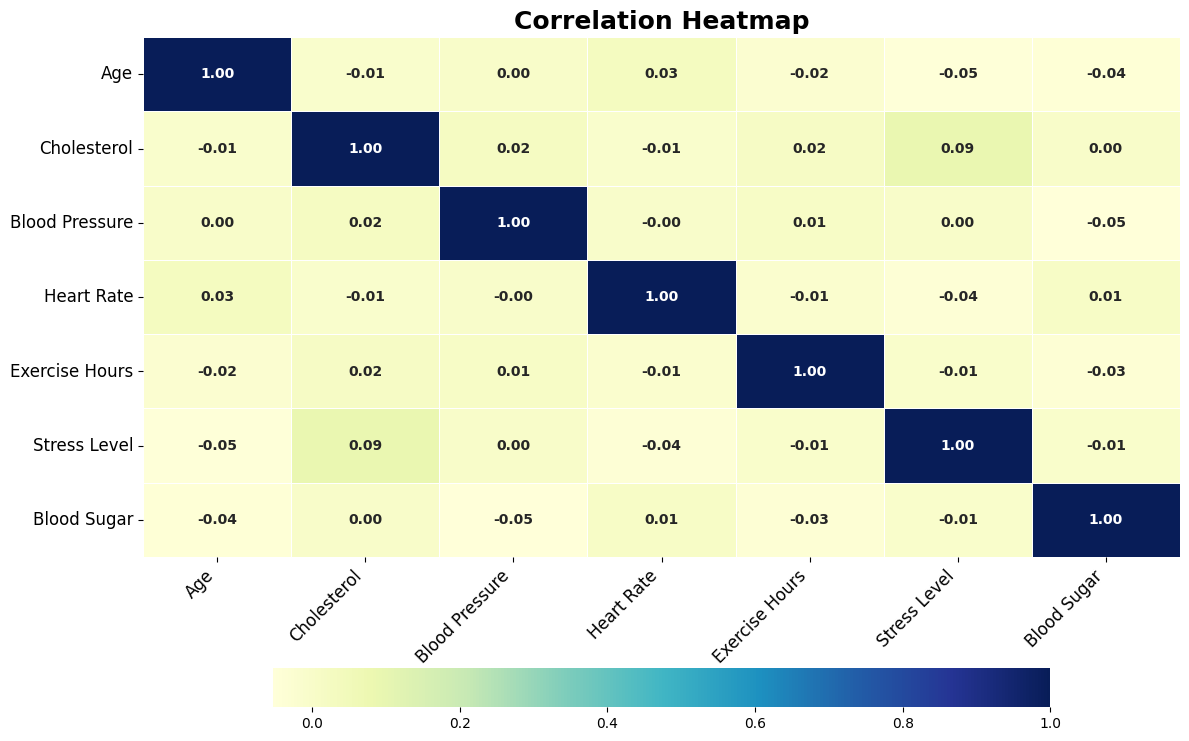

In [ ]:
# a. Correlation Heatmap
plt.figure(figsize=(12, 8))

# Custom colormap (you can change 'YlGnBu' or other palettes)
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            fmt=".2f",  # Format the annotation to two decimal places
            cmap='YlGnBu',  # Changed color map to Yellow-Green-Blue
            linewidths=0.5,  # Add gridlines for distinction
            linecolor='white',  # Gridline color
            cbar_kws={'orientation': 'horizontal', 'shrink': 0.75},  # Horizontal color bar, smaller size
            annot_kws={"size": 10, "weight": "bold"})  # Bold annotations

# Title and styling
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(fontsize=12, rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()

plt.show()

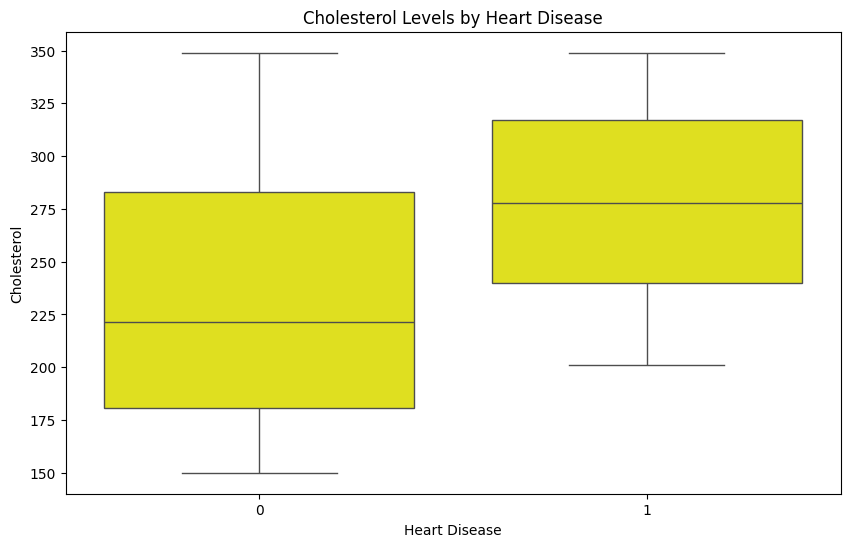

In [ ]:

# Box plot of Cholesterol by Heart Disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart Disease', y='Cholesterol', data=df, color='yellow')
plt.title('Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

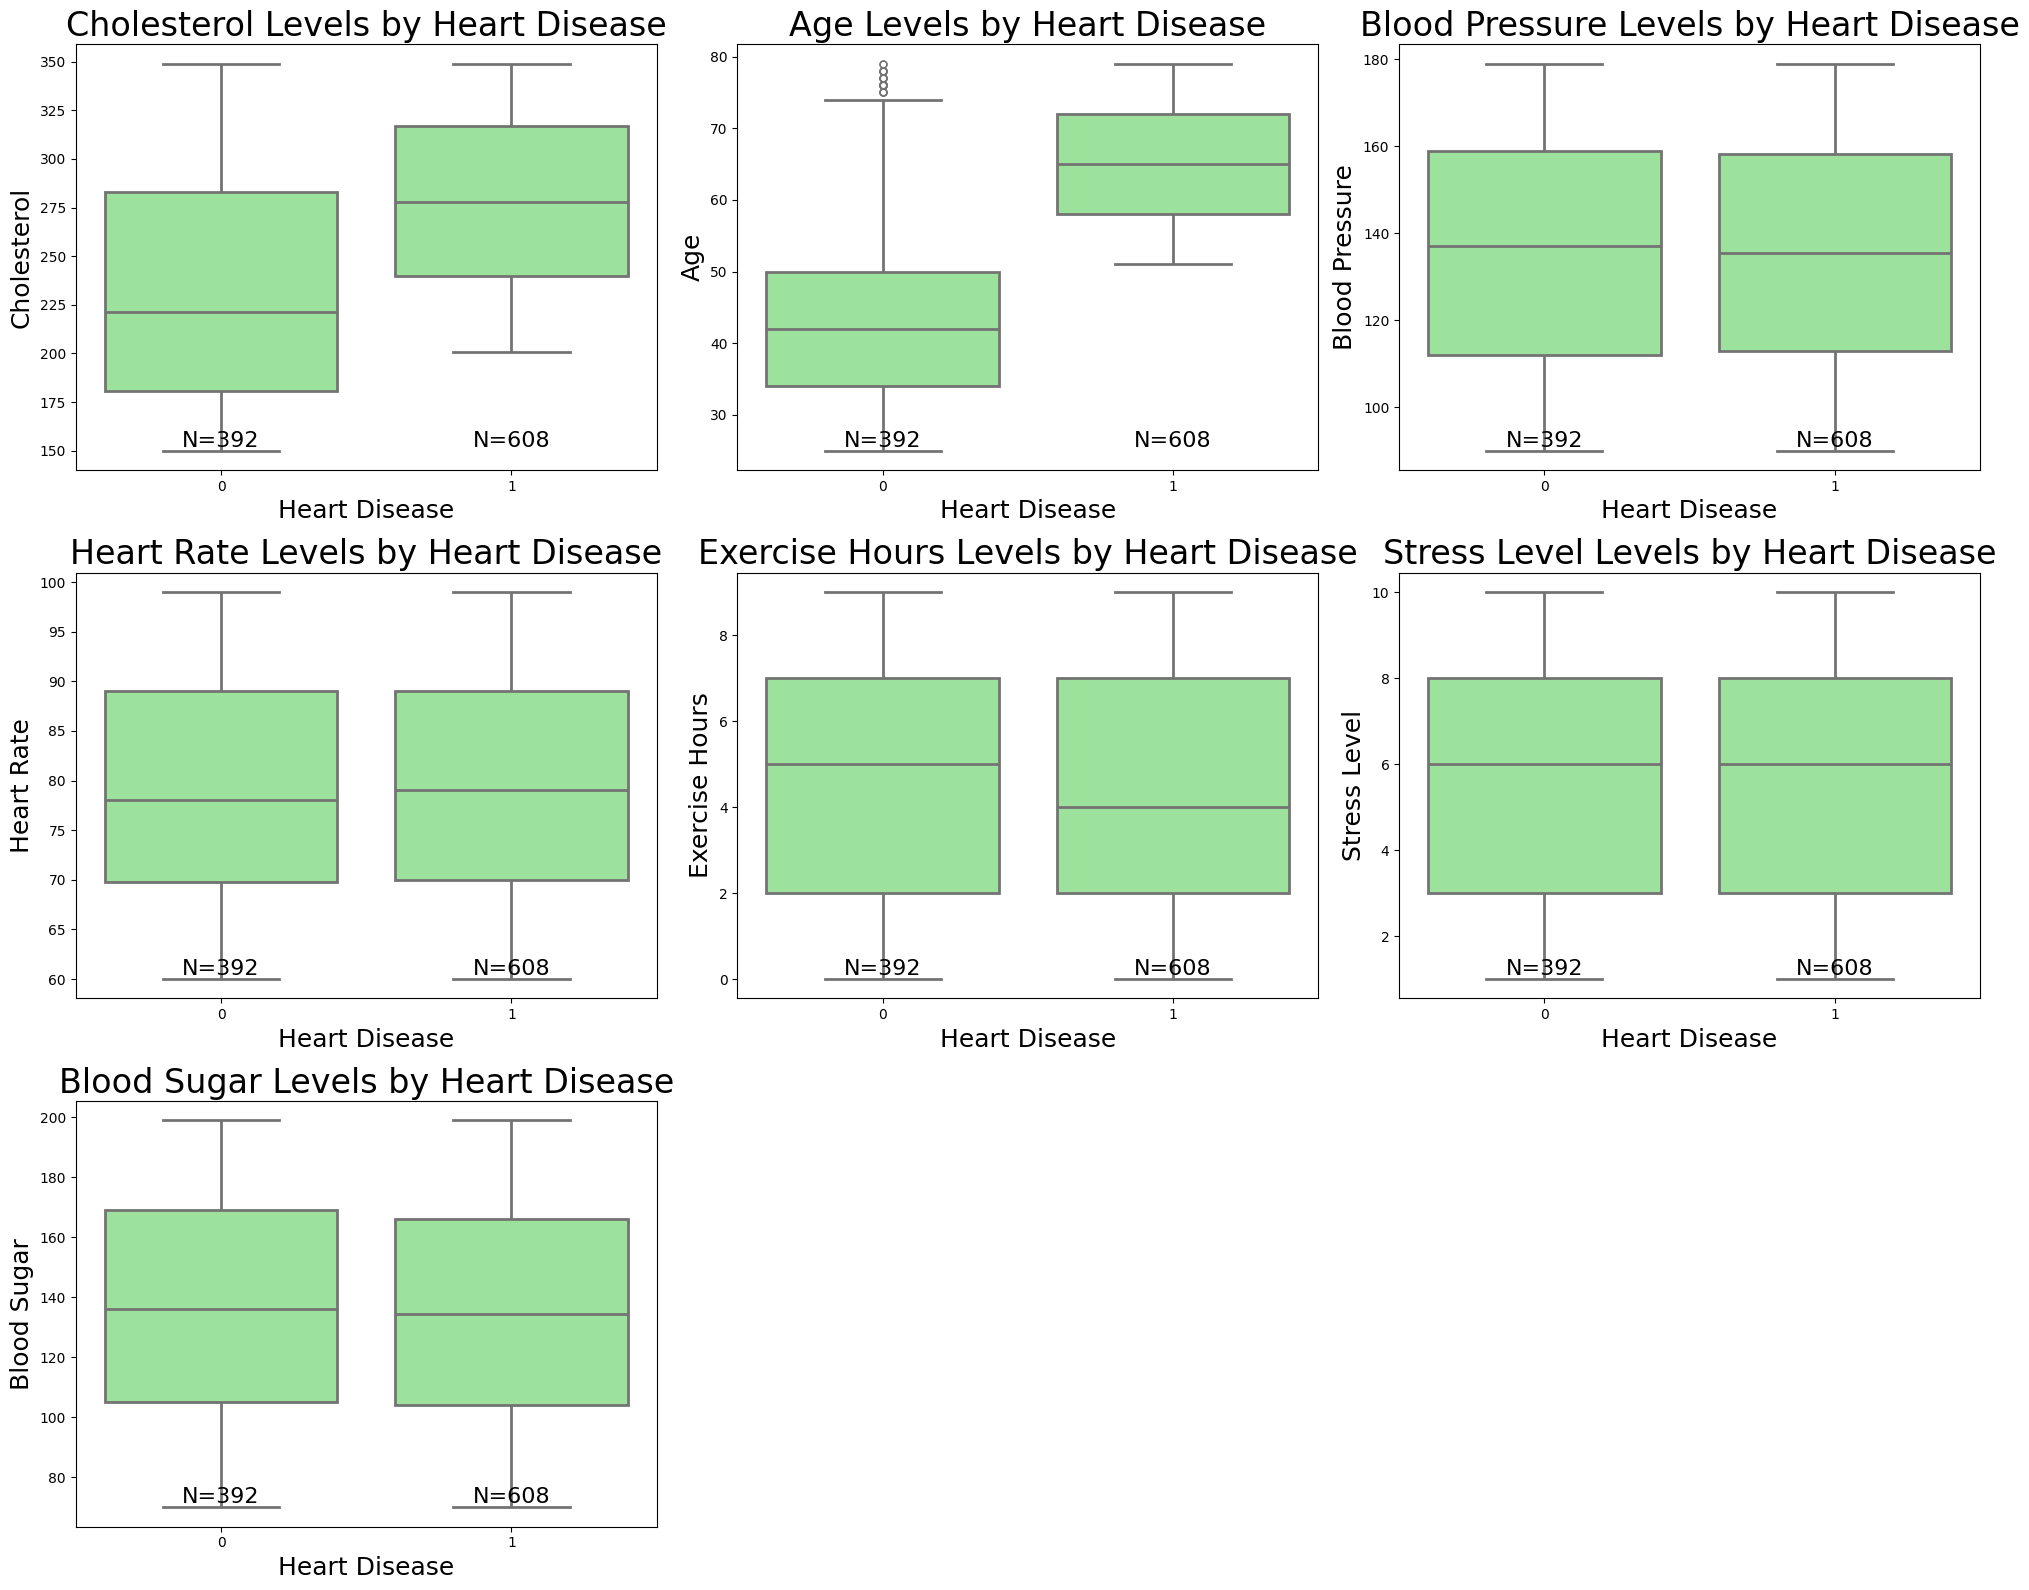

In [ ]:
# List of features to plot
features = ['Cholesterol', 'Age', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']

plt.figure(figsize=(20, 16))  # Further increased figure size for better visibility

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    ax = sns.boxplot(x='Heart Disease', y=feature, data=df, color='lightgreen',
                     linewidth=2,  # Thicker lines for better visibility
                     fliersize=5)  # Larger outliers

    plt.title(f'{feature} Levels by Heart Disease', fontsize=24)  # Increased title font size
    plt.xlabel('Heart Disease', fontsize=18)  # Increased xlabel font size
    plt.ylabel(feature, fontsize=18)  # Increased ylabel font size

    # Count total data points for each category
    for j, category in enumerate(df['Heart Disease'].unique()):
        count = df[df['Heart Disease'] == category][feature].count()
        ax.annotate(f'N={count}', (j, df[feature].min()), ha='center', va='bottom', fontsize=16, color='black')

plt.tight_layout()
plt.show()



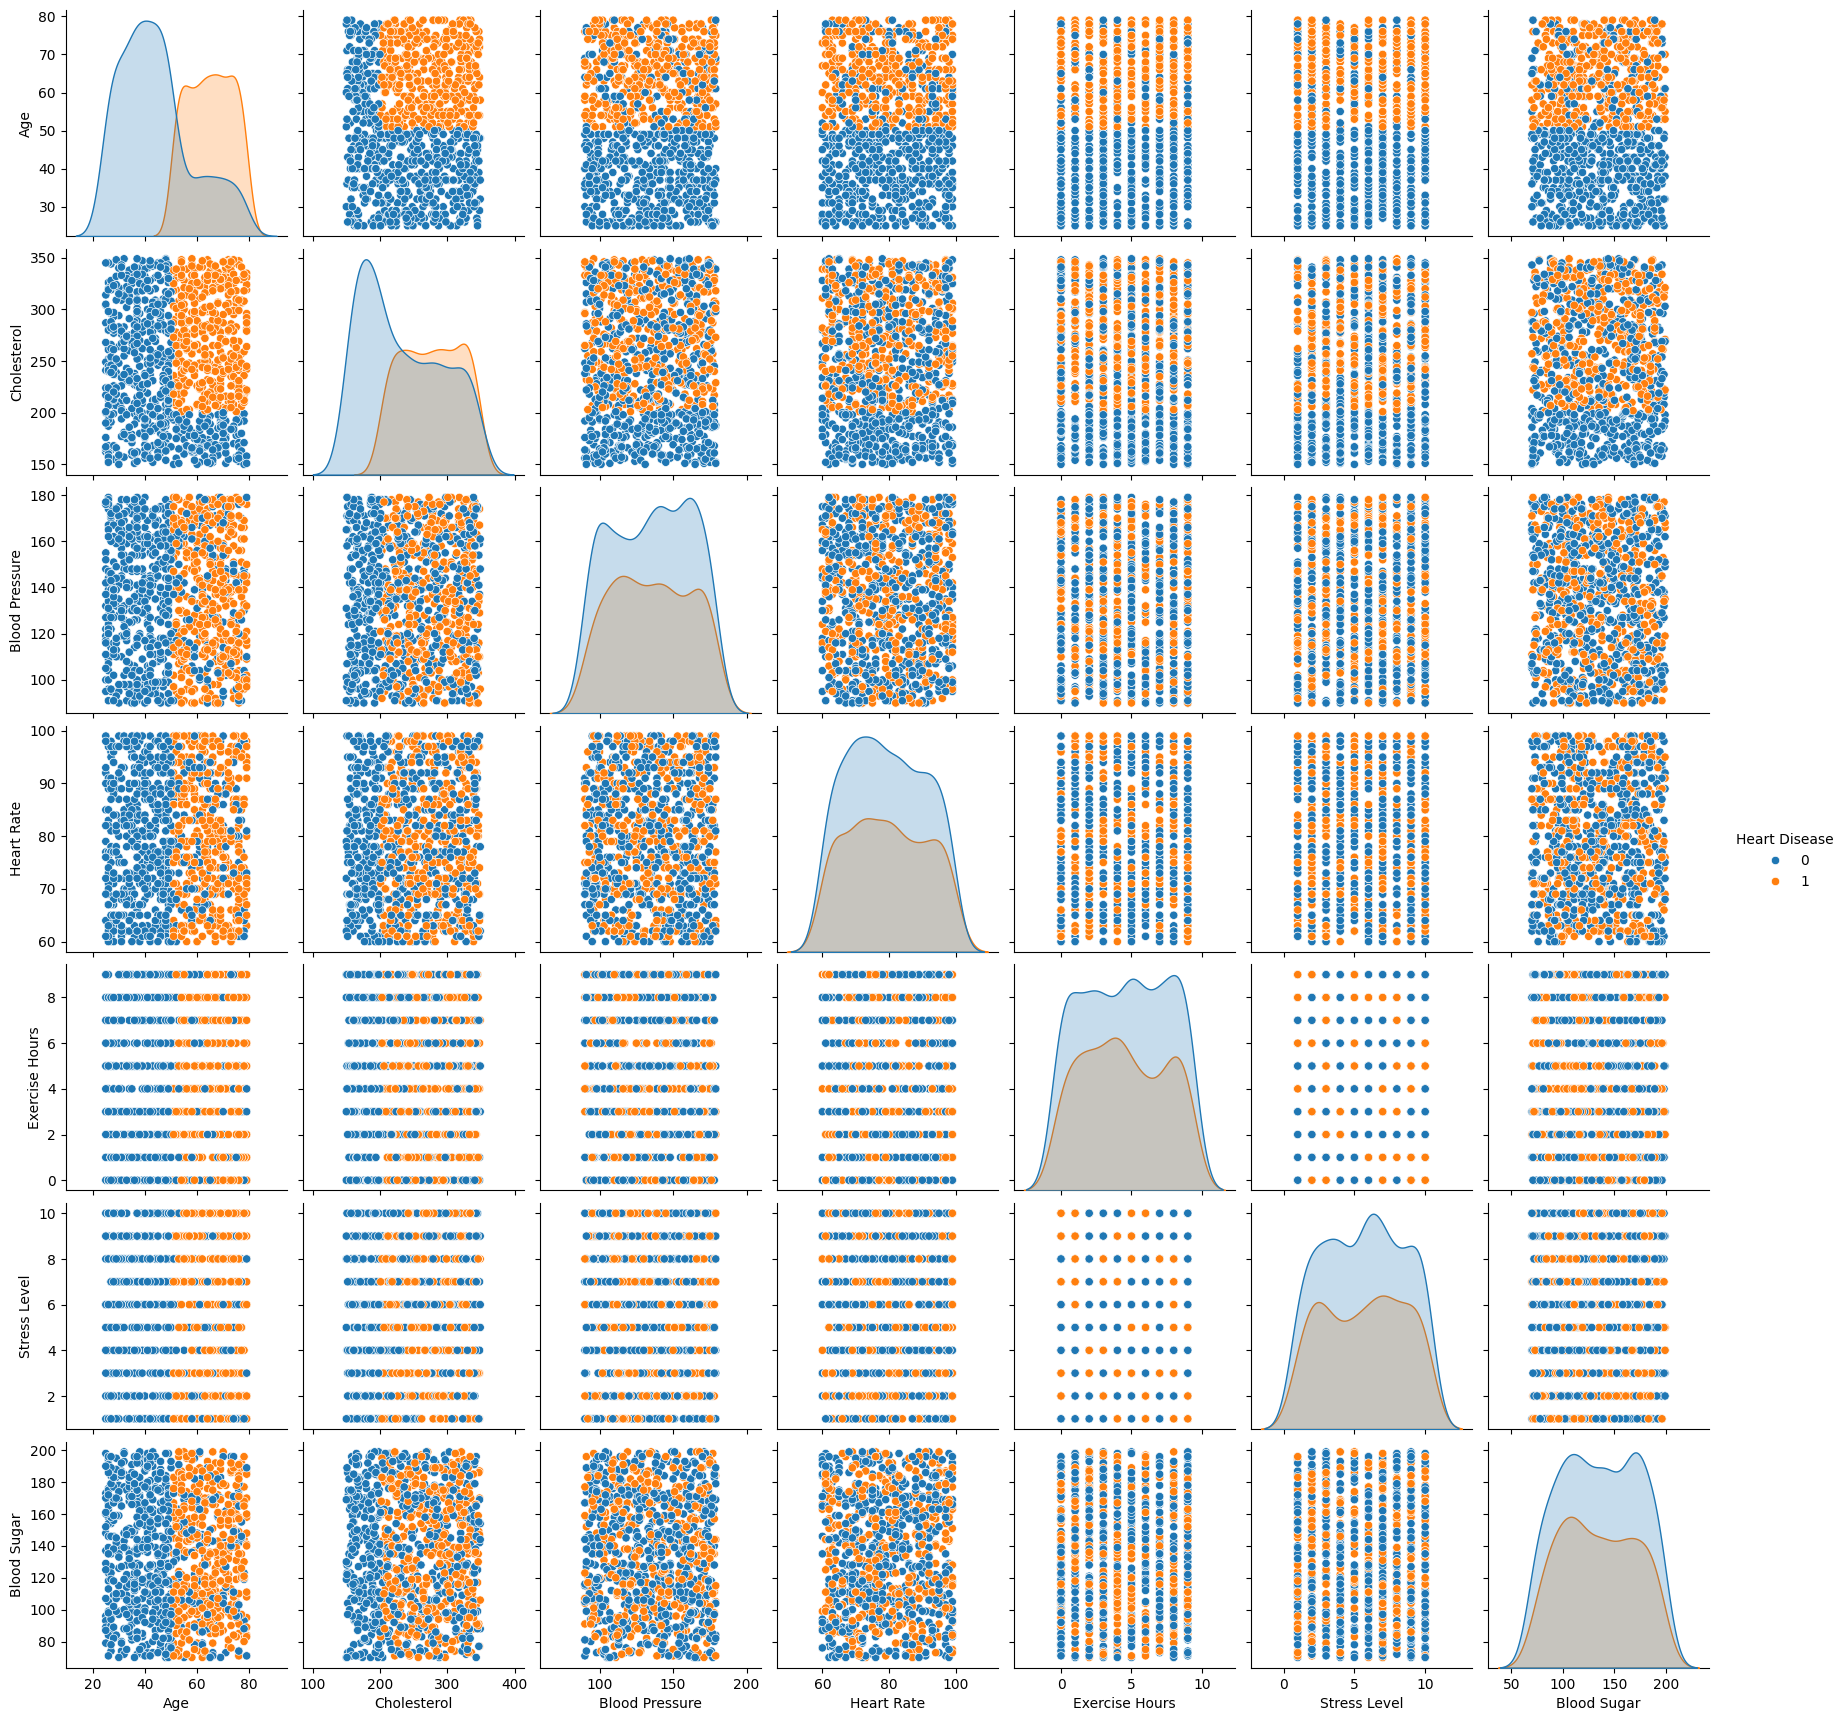

In [ ]:
# Pairplot to see pairwise relationships in the dataset
sns.pairplot(df, hue='Heart Disease', diag_kind='kde')
plt.show()